In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/home/lion/.local/lib/python3.9/site-packages/pandas/compat/_optional.py:149: UserWarning: Pandas requires version '1.3.1' or newer of 'bottleneck' (version '1.2.1' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
data = pd.read_csv('survey.csv')
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [4]:
data.drop(columns = ['Timestamp','Country','state','comments'],inplace = True)
data.shape

(1259, 23)

In [5]:
{column: len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Gender': 49,
 'self_employed': 3,
 'family_history': 2,
 'treatment': 2,
 'work_interfere': 5,
 'no_employees': 6,
 'remote_work': 2,
 'tech_company': 2,
 'benefits': 3,
 'care_options': 3,
 'wellness_program': 3,
 'seek_help': 3,
 'anonymity': 3,
 'leave': 5,
 'mental_health_consequence': 3,
 'phys_health_consequence': 3,
 'coworkers': 3,
 'supervisor': 3,
 'mental_health_interview': 3,
 'phys_health_interview': 3,
 'mental_vs_physical': 3,
 'obs_consequence': 2}

In [6]:
{column: data[column].unique() for column in data.select_dtypes('object').columns}

{'Gender': array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
        'Trans-female', 'Cis Female', 'F', 'something kinda male?',
        'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
        'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
        'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
        'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
        'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
        'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
        'Malr', 'p', 'femail', 'Cis Man',
        'ostensibly male, unsure what that really means'], dtype=object),
 'self_employed': array([nan, 'Yes', 'No'], dtype=object),
 'family_history': array(['No', 'Yes'], dtype=object),
 'treatment': array(['Yes', 'No'], dtype=object),
 'work_interfere': array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object),
 'no_employees': array(['6-25', 'More than 1

In [7]:
data['work_interfere'].mode()

0    Sometimes
Name: work_interfere, dtype: object

In [8]:
data['work_interfere'].fillna(value ='Sometimes',inplace = True)

In [9]:
data.isnull().sum()

Age                           0
Gender                        0
self_employed                18
family_history                0
treatment                     0
work_interfere                0
no_employees                  0
remote_work                   0
tech_company                  0
benefits                      0
care_options                  0
wellness_program              0
seek_help                     0
anonymity                     0
leave                         0
mental_health_consequence     0
phys_health_consequence       0
coworkers                     0
supervisor                    0
mental_health_interview       0
phys_health_interview         0
mental_vs_physical            0
obs_consequence               0
dtype: int64

In [10]:
data['self_employed'].fillna(value = data['self_employed'].mode,inplace = True)

In [11]:
data.isnull().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [12]:
#Dealing with the gender column
for i in data.select_dtypes('object').columns:
    data[i] = data[i].str.lower()

males = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail",
        "malr","cis man", "Cis Male", "cis male"]
trans = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", 
          "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", 
          "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]
females = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]
for i in data.index:
    if data.Gender[i] in males:
        data.at[i, 'Gender']='male'
    elif data.Gender[i] in females:
        data.at[i, 'Gender']='female'
    else:
        data.at[i, 'Gender']='others'




<AxesSubplot:xlabel='treatment', ylabel='count'>

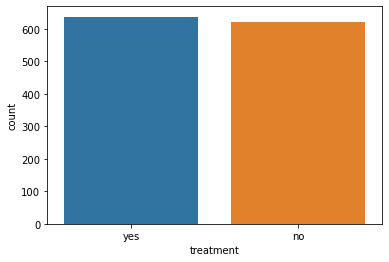

In [13]:
#Checking whether the target class is imbalanced
sns.countplot(x = 'treatment',data = data)

<AxesSubplot:xlabel='Age'>

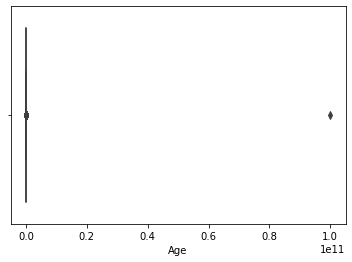

In [14]:
#Checking for outliers in age column
sns.boxplot(x = data['Age'])


In [15]:
data['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

<AxesSubplot:xlabel='Age'>

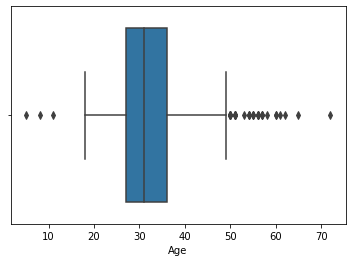

In [16]:
data.drop(data[data['Age'] < 0].index, inplace = True) 
data.drop(data[data['Age'] > 100].index, inplace = True)
sns.boxplot(x = data['Age'])

In [17]:
data.shape


(1254, 23)

In [18]:

Q1 = data['Age'].quantile(0.25)
Q2 = data['Age'].quantile(0.5)
Q3 = data['Age'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(Q2)
print(upper_bound)



13.5
31.0
49.5


<AxesSubplot:xlabel='Age'>

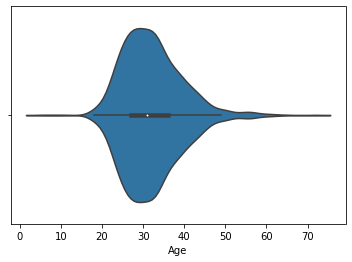

In [19]:
sns.violinplot(x = data['Age'])

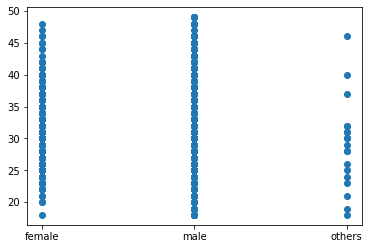

In [20]:
#Replacing outliers with the median value
data['Age'] = np.where((data['Age'] > upper_bound) | (data['Age']< lower_bound), data['Age'].median(), data['Age'])
plt.scatter(x = data ['Gender'],y = data ['Age'])

In [21]:
data.select_dtypes('object').columns

Index(['Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [22]:
df= pd.crosstab(index = data['Gender'],columns = data['treatment'])
df

treatment,no,yes
Gender,,
female,77,170
male,540,448
others,4,15


In [23]:
#checking correlation between categorical variables and the target variable using chi_square test
#The null hypothesis   : Treatment variable and categorical variables are independent
#Alternate hypothesis : Treatment variable and categorical variables are dependent
from scipy import stats
for i in data.select_dtypes('object').columns:
    if i != 'treatment':
        df_chi = pd.crosstab(index = data[i],columns = data['treatment'])
        (chi2,p,dof,_) = stats.chi2_contingency(df_chi.values)
        print('\n chi_square test for',i)
        print('chi2 value : ',chi2)
        print('p_value : ', p)
        print('Degrees of freedom : ',dof)
    


 chi_square test for Gender
chi2 value :  49.84114857141851
p_value :  1.503599254992492e-11
Degrees of freedom :  2

 chi_square test for self_employed
chi2 value :  0.24668994919631185
p_value :  0.6194154902858475
Degrees of freedom :  1

 chi_square test for family_history
chi2 value :  177.69583537275963
p_value :  1.5435847916844047e-40
Degrees of freedom :  1

 chi_square test for work_interfere
chi2 value :  208.48942243271537
p_value :  6.175149766976444e-45
Degrees of freedom :  3

 chi_square test for no_employees
chi2 value :  8.641176655867119
p_value :  0.12426116460698207
Degrees of freedom :  5

 chi_square test for remote_work
chi2 value :  0.7947356042818913
p_value :  0.37267201299746844
Degrees of freedom :  1

 chi_square test for tech_company
chi2 value :  1.1883564135656606
p_value :  0.27566133799267967
Degrees of freedom :  1

 chi_square test for benefits
chi2 value :  64.71668484237101
p_value :  8.85014615634913e-15
Degrees of freedom :  2

 chi_square test

In [24]:
cols_to_drop = ['self_employed','no_employees','remote_work','tech_company','supervisor','phys_health_interview','phys_health_consequence']
data.drop(columns = cols_to_drop,inplace = True)

Text(0.5, 1.0, 'Cramer V Correlation between Variables')

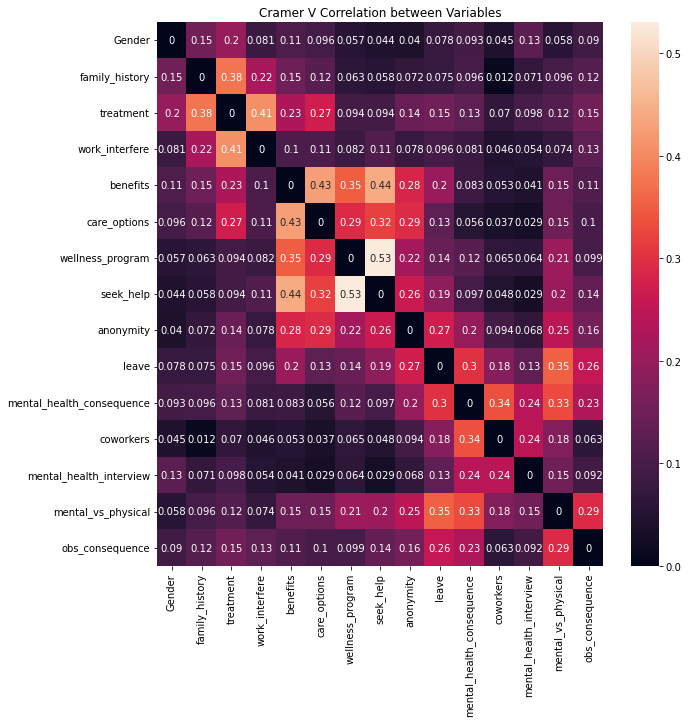

In [25]:
#Using cramer's v test to check for correlation between categorical variables
import itertools
def cramers_v(table):
    (chi2,p,dof,_) = stats.chi2_contingency(table.values)
    min_idx = min(len(table.index),len(table.columns))
    s = min_idx - 1
    result = np.sqrt(chi2/(data.shape[0] * s))
    return result

cols = list(data.select_dtypes('object').columns)
corr_matrix = np.zeros((len(cols),len(cols)))

for col1,col2 in itertools.combinations(cols,2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corr_matrix[idx1, idx2] = cramers_v(pd.crosstab(data[col1], data[col2]))
    corr_matrix[idx2, idx1] = corr_matrix[idx1, idx2]

corr = pd.DataFrame(corr_matrix, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr, annot=True, ax=ax)
ax.set_title("Cramer V Correlation between Variables")


In [26]:
Target_variable = 'treatment'
#binary_features = ['family_history','obs_consequence']
ordinal_features = ['work_interfere','leave']
nominal_features = ['Gender','family_history','benefits','care_options','wellness_program','seek_help','anonymity',
                   'mental_health_consequence','coworkers','mental_health_interview','mental_vs_physical','obs_consequence']

In [27]:
#converting the target variable into ones and zeros
data['treatment'].replace(to_replace = ['yes','no'],value = [1,0],inplace = True)


In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [29]:
X = data.drop(columns = 'treatment')
y = data['treatment']
X_train,x_test,Y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 10)

In [30]:
ct = ColumnTransformer([('enc',OrdinalEncoder(),ordinal_features),
                                      ('ohe',OneHotEncoder(),nominal_features)],remainder = 'passthrough')

In [31]:
X_train.columns

Index(['Age', 'Gender', 'family_history', 'work_interfere', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'coworkers', 'mental_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [32]:
pipeline_rfc = Pipeline([('transformer',ct),('rfc',RandomForestClassifier())])
pipeline_dtc = Pipeline([('transformer',ct),('dtc',DecisionTreeClassifier())])
pipeline_lr = Pipeline([('transformer',ct),('lr',LogisticRegression())])
pipeline_nb = Pipeline([('transformer',ct),('lr',GaussianNB())])

In [33]:
pipelines = [pipeline_rfc,pipeline_dtc,pipeline_lr,pipeline_nb]

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, Y_train)

In [34]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'RandomForest', 1: 'Decision Tree', 2: 'LogisticRegression',3:'Naive_bayes'}
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(x_test,y_test)))

RandomForest Test Accuracy: 0.713527851458886
Decision Tree Test Accuracy: 0.6631299734748011
LogisticRegression Test Accuracy: 0.6976127320954907
Naive_bayes Test Accuracy: 0.6843501326259946


In [35]:
pipe_dict = {0: 'RandomForest', 1: 'Decision Tree', 2: 'LogisticRegression',3:'Naive_bayes'}
for i,model in enumerate(pipelines):
    print("{} Train Accuracy: {}".format(pipe_dict[i],model.score(X_train, Y_train)))

RandomForest Train Accuracy: 1.0
Decision Tree Train Accuracy: 1.0
LogisticRegression Train Accuracy: 0.7251995438996579
Naive_bayes Train Accuracy: 0.7080957810718358


In [36]:
import joblib
filename = 'rfc2.sav'
joblib.dump(pipeline_rfc,filename)


['rfc2.sav']